In [1]:
!pip install pmdarima 
!pip install arch
!pip install yfinance

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 808kB 2.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4d8cffe095a542765536a07295c1457abe82eeeece0150a94c21d6c468ce3335
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()
from google.colab import files
import io

## Loading the data

In [0]:
raw_data = yfinance.download (tickers = "^FTSE", start = "1994-01-07", 
                              end = "2019-09-01", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  1 of 1 completed


In [0]:
df_comp = raw_data.copy()

In [0]:
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [0]:
df_comp=df_comp.iloc[:,0:4]

In [0]:
df_comp.head()

,Open,High,Low,Close
Date,,,,
1994-01-07,3401.399902,3446.800049,3398.699951,3446.000000
1994-01-10,3465.699951,3468.100098,3430.000000,3440.600098
1994-01-11,3442.500000,3442.500000,3413.500000,3413.800049
1994-01-12,3394.800049,3402.399902,3372.000000,3372.000000
1994-01-13,3380.699951,3383.300049,3356.899902,3360.000000


##creating returns

In [0]:
df_comp['ret_ftse'] = df_comp.Close.pct_change(1).mul(100)

In [0]:
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100

In [0]:
df_comp

,Open,High,Low,Close,ret_ftse
Date,,,,,
1994-01-07,3401.399902,3446.800049,3398.699951,3446.000000,NaN
1994-01-10,3465.699951,3468.100098,3430.000000,3440.600098,-0.156701
1994-01-11,3442.500000,3442.500000,3413.500000,3413.800049,-0.778935
1994-01-12,3394.800049,3402.399902,3372.000000,3372.000000,-1.224443
1994-01-13,3380.699951,3383.300049,3356.899902,3360.000000,-0.355872
...,...,...,...,...,...
2019-08-26,7128.200195,7188.600098,7095.000000,7095.000000,0.000000
2019-08-27,7095.000000,7110.799805,7044.700195,7089.600098,-0.076109
2019-08-28,7089.600098,7131.200195,7050.000000,7114.700195,0.354041


##Splitting Data

In [0]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

##Fitting the model

In [0]:
model_ar = ARIMA(df.Close, order = (1,0,0))
results_ar = model_ar.fit()

In [0]:
results_ar

##Simple Forecasting

In [0]:
df.tail()

,Open,High,Low,Close,ret_ftse
Date,,,,,
2014-07-08,6823.500000,6831.000000,6738.500000,6738.500000,-1.245695
2014-07-09,6738.500000,6740.799805,6692.799805,6718.000000,-0.304222
2014-07-10,6718.000000,6724.799805,6643.600098,6672.399902,-0.678775
2014-07-11,6672.399902,6696.100098,6663.700195,6690.200195,0.266775
2014-07-14,6690.200195,6760.700195,6690.200195,6746.100098,0.835549


In [0]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2014-07-15"
end_date = "2014-07-22"

In [0]:
end_date = "2019-07-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

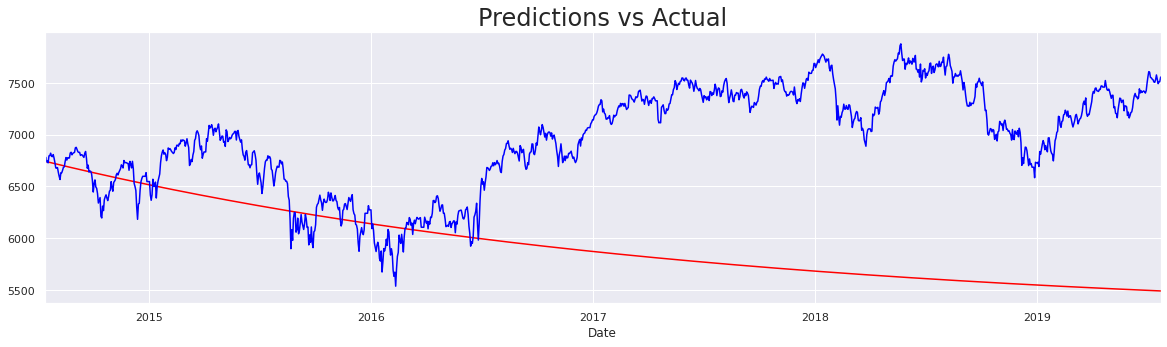

In [0]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Close[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [0]:
from statsmodels.tools.eval_measures import rmse

In [0]:
from statsmodels.tools.eval_measures import mse

In [0]:
df_test.head()

,Open,High,Low,Close,ret_ftse
Date,,,,,
2014-07-15,6746.100098,6764.000000,6709.200195,6710.500000,-0.527714
2014-07-16,6710.500000,6792.600098,6710.500000,6784.700195,1.105733
2014-07-17,6784.700195,6784.700195,6727.700195,6738.299805,-0.683897
2014-07-18,6738.299805,6749.899902,6690.899902,6749.500000,0.166217
2014-07-21,6749.500000,6753.399902,6715.799805,6728.399902,-0.312617


In [0]:
df.tail()

,Open,High,Low,Close,ret_ftse
Date,,,,,
2014-07-08,6823.500000,6831.000000,6738.500000,6738.500000,-1.245695
2014-07-09,6738.500000,6740.799805,6692.799805,6718.000000,-0.304222
2014-07-10,6718.000000,6724.799805,6643.600098,6672.399902,-0.678775
2014-07-11,6672.399902,6696.100098,6663.700195,6690.200195,0.266775
2014-07-14,6690.200195,6760.700195,6690.200195,6746.100098,0.835549


In [0]:
start = "2014-01-02"
end= "2014-07-11"

In [0]:
df_pred_2  = results_ar.predict(start=start,end=end)

In [0]:
RMSE = rmse(df_test.Close,df_pred_2)

ValueError: ignored

In [0]:
MSE = mse(df_test.Close,df_pred_2)

ValueError: ignored

In [0]:
print(RMSE)

1279.9607493890035


In [0]:
print(MSE)

1638299.5199764592


In [0]:
start_2 = "2014-07-15"
end_2 = "2014-08-11"

In [0]:
pred_3  = results_ar.predict(start=start_2,end=end_2)

In [0]:
df_test_3 = df_test.Close[start_2:end_2]

In [0]:
RMSE_3 = rmse(df_test_3,pred_3)

In [0]:
print(RMSE_3)

65.2079057515913


##calculating using returns

In [0]:
end_date = "2014-08-18"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date) 

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [0]:
df.head()

In [0]:
model_ar_ret = ARIMA(df.ret_ftse[1:], order = (1,0,0))
results_ar_ret = model_ar_ret.fit()

In [0]:
df_pred_4  = results_ar_ret.predict(start=start,end=end)

In [0]:
RMSE_4 = rmse(df_test.ret_ftse,df_pred_4)

In [0]:
print(RMSE_4)

In [0]:
#installing required pacakges for ARIMA forecasting and data collection
!pip install pmdarima 
!pip install arch
!pip install yfinance
#importing required packages for ARIMA forecasting
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.eval_measures import rmse

#Transforming featues, deducting returns and normal returns from close price
df_comp['ret_ftse'] = df_comp.Close.pct_change(1).mul(100)
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
#Splitting dataset
size = int(len(df_comp)*0.7)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#Fitting the model
model_ar = ARIMA(df.Close, order = (1,0,0))
#model_ar = ARIMA(df.ret_ftse, order = (1,0,0))
#model_ar = ARIMA(df.nor_ret_ftse, order = (1,0,0))
#model_ar = ARIMA(df.Close, order = (5,1,0))
results_ar = model_ar.fit()

#defininig variable to store dates for predciton window
start = "2014-07-15"
end = "2018-07-22"

#prediction stage 
df_prediction  = results_ar.predict(start=start,end=end)

#Calcualting error
RMSE = rmse(df_test.Close,df_prediction)
